# Regresja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Boston

In [2]:
boston = datasets.load_boston()
# print description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# get the data
boston_X = boston.data
boston_Y = boston.target

In [4]:
X=boston_X
y=boston_Y

# Zadanie
Znajdż najleprzy model za pomocą podwujną cross-validation (nested cross-validation, double cross-validation) .


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)

In [6]:
grid_1 = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(degree=2), ElasticNet(alpha=1, tol=0.1)),
                      param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                      'elasticnet__alpha': [1., 2., 3.]},
                      scoring='r2',
                      cv=kfold, 
                      n_jobs=-1)
scores_1 = cross_val_score(grid_1, X, y, scoring='r2', cv=5)
print('CV ElasticNet R2: %.3f +/- %.3f' % (np.mean(scores_1), np.std(scores_1)))

CV ElasticNet R2: -0.297 +/- 1.530


In [7]:
grid_2 = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso(alpha=1)),
                      param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5],
                      'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]},
                      scoring='r2',
                      cv=kfold,
                      n_jobs=-1)

scores_2 = cross_val_score(grid_2, X, y, scoring='r2', cv=5)
print('CV Lasso R2: %.3f +/- %.3f' % (np.mean(scores_2), np.std(scores_2)))

/home/kuba/anaconda3/envs/foai/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1318.8327807135695, tolerance: 3.919148542079209
  model = cd_fast.enet_coordinate_descent(
/home/kuba/anaconda3/envs/foai/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1365.5228548708667, tolerance: 3.3071316790123473
  model = cd_fast.enet_coordinate_descent(
/home/kuba/anaconda3/envs/foai/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2336.8577221381415, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
/home/kuba/anaconda3/envs/foai/lib/python3.9/site-package

CV Lasso R2: 0.086 +/- 0.651


/home/kuba/anaconda3/envs/foai/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1256.9183926367823, tolerance: 3.480910444444445
  model = cd_fast.enet_coordinate_descent(


In [8]:
grid_3 = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1, tol=0.1)),
                      param_grid={'polynomialfeatures__degree': [1, 2, 3, 4],
                      'ridge__alpha': [1., 2., 3.]},
                      scoring='r2',
                      cv=kfold,
                      n_jobs=-1)
scores_3 = cross_val_score(grid_3, X, y, scoring='r2', cv=5)
print('CV Ridge R2: %.3f +/- %.3f' % (np.mean(scores_3), np.std(scores_3)))

CV Ridge R2: 0.204 +/- 0.208


In [9]:
grid_4 = GridSearchCV(estimator=make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                      param_grid={'polynomialfeatures__degree': [1, 2, 3, 4]},
                      scoring='r2',
                      cv=kfold,
                      n_jobs=-1)
scores_4 = cross_val_score(grid_4, X, y, scoring='r2', cv=5)
print('CV LR R2: %.3f +/- %.3f' % (np.mean(scores_4), np.std(scores_4)))

CV LR R2: -0.193 +/- 0.746


# Zad
Zwizualizuj wyniki.

       method       mse       std  scores_1  scores_2  scores_3  scores_4  \
0  ElasticNet  0.485933  1.530144  0.599315  0.667882  0.726430 -3.282780   
1       Lasso  0.086186  0.650823  0.472039 -0.073271  0.772067  0.355392   
2       Ridge  0.017039  0.208354  0.341324  0.445034  0.204226  0.201737   
3          LR  0.118872  0.746487  0.208738 -1.585365  0.587023  0.079231   

   scores_5  
0 -0.196813  
1 -1.097302  
2 -0.170295  
3 -0.252942  


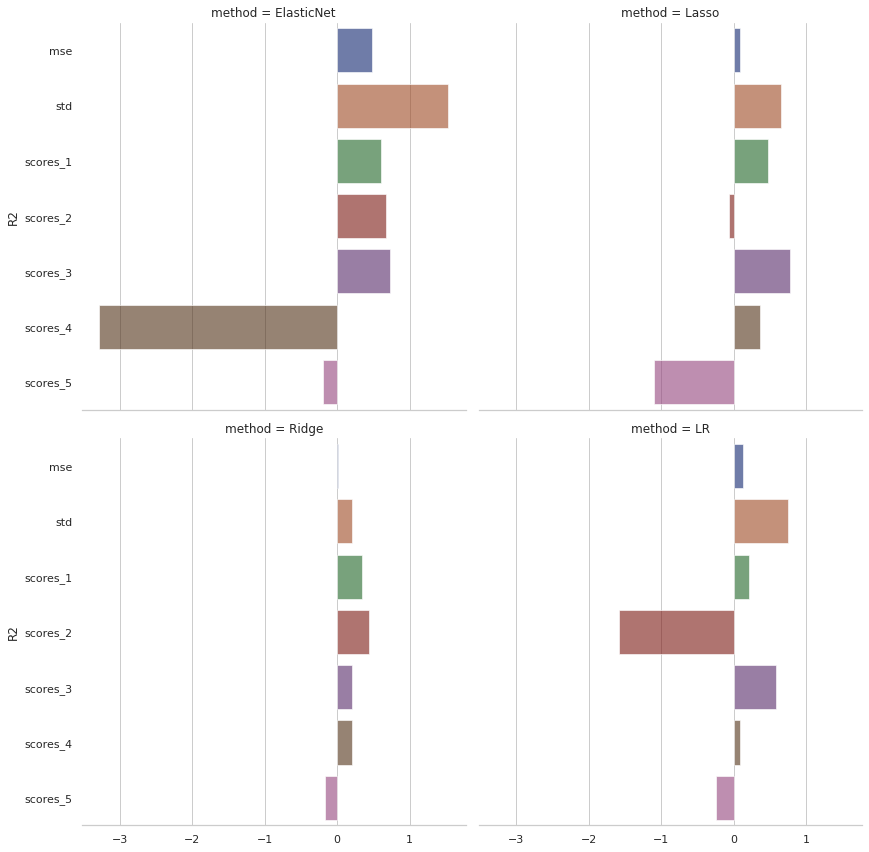

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


results = pd.DataFrame({
    'ElasticNet': [np.mean(scores_1**2)/len(scores_1), np.std(scores_1), *scores_1], 
    'Lasso': [np.mean(scores_2**2)/len(scores_1), np.std(scores_2), *scores_2],
    'Ridge': [np.mean(scores_3**2)/len(scores_1), np.std(scores_3), *scores_3],
    'LR':    [np.mean(scores_4**2)/len(scores_1), np.std(scores_4), *scores_4]
}).transpose().reset_index()
results.columns = ['method', 'mse', 'std', *[f'scores_{i+1}' for i in range(len(scores_1))]]
print(results)

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=results, kind="bar",
    col='method',
    ci="sd", palette="dark", alpha=.6, height=6,
    orient='h', col_wrap=2
)
g.despine(left=True)
g.set_axis_labels("", "R2")